<h1 align='center'> 8.2 Combining and Merging Datasets
    

<b>Database-Style DataFrame Joins

In [1]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

In [2]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [3]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [4]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [5]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Note  that  I  didn’t  specify  which  column  to  join  on.  If  that  information  is  not  speci‐fied,  merge  uses  the  overlapping  column  names  as  the  keys.  It’s  a  good  practice  tospecify explicitly, though:

In [6]:
pd.merge(df1,df2,on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


If the column names are different in each object, you can specify them separately:

In [7]:
df1 = pd.DataFrame({'1_key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'2_key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [8]:
pd.merge(df1,df2,left_on='1_key',right_on='2_key')

,1_key,data1,2_key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


You may notice that the 'c' and 'd' values and associated data are missing from theresult. By default merge does an 'inner' join; the keys in the result are the intersec‐tion,  or  the  common  set  found  in  both  tables.  Other  possible  options  are  'left','right',  and  'outer'.  The  outer  join  takes  the  union  of  the  keys,  combining  theeffect of applying both left and right joins:

Its just like Sql.Many-to-many  joins  form  the  Cartesian  product  of  the  rows.  

In [9]:
pd.merge(df1,df2,left_on='1_key',right_on='2_key',how='outer')

,1_key,data1,2_key,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


In [10]:
pd.merge(df1,df2,left_on='1_key',right_on='2_key',how='right')

,1_key,data1,2_key,data2
0,b,0.0,b,1
1,b,1.0,b,1
2,b,6.0,b,1
3,a,2.0,a,0
4,a,4.0,a,0
5,a,5.0,a,0
6,NaN,NaN,d,2


To  determine  which  key  combinations  will  appear  in  the  result  depending  on  thechoice  of  merge  method,  think  of  the  multiple  keys  as  forming  an  array  of  tuples  tobe used as a single join key (even though it’s not actually implemented that way)

When  you’re  joining  columns-on-columns,  the  indexes  on  thepassed DataFrame objects are discarded

A  last  issue  to  consider  in  merge  operations  is  the  treatment  of  overlapping  columnnames.  While  you  can  address  the  overlap  manually  (see  the  earlier  section  onrenaming  axis  labels),  merge  has  a  suffixes  option  for  specifying  strings  to  appendto overlapping names in the left and right DataFrame objects

     pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

<b>Merging on Index

In  some  cases,  the  merge  key(s)  in  a  DataFrame  will  be  found  in  its  index.  In  thiscase, you can pass left_index=True or right_index=True (or both) to indicate thatthe index should be used as the merge key:

In [11]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

right1 = pd.DataFrame({'group_val': [3.5, 7]},
                      index=['a', 'b'])

left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [12]:
right1

,group_val
a,3.5
b,7.0


In [13]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


With hierarchically indexed data, things are more complicated, as joining on index isimplicitly a multiple-key merge:

In [14]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                              'Nevada', 'Nevada'],                     
                     'key2': [2000, 2001, 2002, 2001, 2002],
                     'data': np.arange(5.)})

righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio','Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]]
                      ,columns=['event1', 'event2'])

lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [15]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In  this  case,  you  have  to  indicate  multiple  columns  to  merge  on  as  a  list  (note  thehandling of duplicate index values with how='outer'

In [16]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


DataFrame has a convenient join instance for merging by index. It can also be usedto combine together many DataFrame objects having the same or similar indexes butnon-overlapping columns. 

    left.join(right, how='outer')
    

DataFrame’s  joinmethod  performs  a  left  join  on  the  join  keys,  exactly  preserving  the  left  frame’s  rowindex. It also supports joining the index of the passed DataFrame on one of the col‐umns of the calling DataFrame:

    left.join(right, on='key')

Lastly, for simple index-on-index merges, you can pass a list of DataFrames to join asan  alternative  to  using  the  more  general  concat  function  described  in  the  next  section

        left2.join([right2, another])



<b>Concatenating Along an Axis

In [17]:
arr = np.arange(12).reshape((3, 4))

In [18]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In  the  context  of  pandas  objects  such  as  Series  and  DataFrame,  having  labeled  axesenable  you  to  further  generalize  array  concatenation.  

In  particular,  you  have  a  num‐ber of additional things to think about:

    •If  the  objects  are  indexed  differently  on  the  other  axes,  should  we  combine  the 
    distinct elements in these axes or use only the shared values (the intersection)?

    •Do  the  concatenated  chunks  of  data  need  to  be  identifiable  in  the  resultingobject?

    •Does  the  “concatenation  axis”  contain  data  that  needs  to  be  preserved?  In  manycases,  
    the  default  integer  labels  in  a  DataFrame  are  best  discarded  duringconcatenation.

In [19]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [20]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [21]:
pd.concat([s1, s2, s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [22]:
s4=pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [23]:
pd.concat([s4, s3],axis=1,join='inner')

,0,1
f,5,5
g,6,6


A potential issue is that the concatenated pieces are not identifiable in the result. Sup‐pose instead you wanted to create a hierarchical index on the concatenation axis. Todo this, use the keys argument.



In [24]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In  the  case  of  combining  Series  along  axis=1,  the  keys  become  the  DataFrame  col‐umn headers:

In [25]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'],axis=1)
result

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In  the  case  of  combining  Series  along  axis=1,  the  keys  become  the  DataFrame  col‐umn headers:

The same logic extends to DataFrame objects:

In [26]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                  columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                                                                                                                                                   columns=['three', 'four'])

In [27]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

A  last  consideration  concerns  DataFrames  in  which  the  row  index  does  not  containany relevant data:

In this case, you can pass ignore_index=True:

    pd.concat([df1, df2], ignore_index=True)

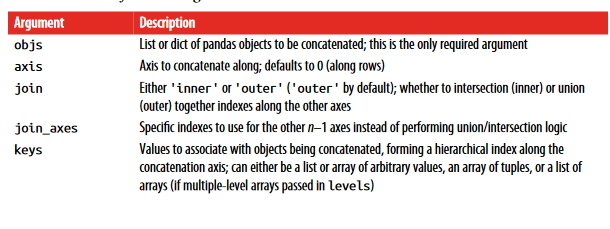

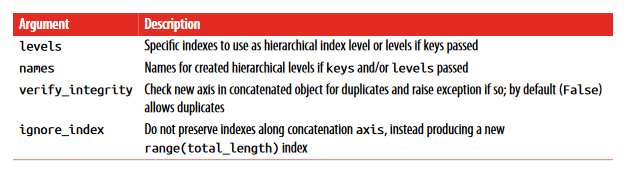

<b>Combining Data with Overlap

There is another data combination situation that can’t be expressed as either a mergeor concatenation operation. You may have two datasets whose indexes overlap in fullor part. As a motivating example, consider NumPy’s where function, which performsthe array-oriented equivalent of an if-else expression:

In [28]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [29]:
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

Series has a combine_first method, which performs the equivalent of this operationalong with pandas’s usual data alignment logic:

In [30]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

With  DataFrames,  combine_first  does  the  same  thing  column  by  column,  so  youcan  think  of  it  as  “patching”  missing  data  in  the  calling  object  with  data  from  theobject you pass:

In [31]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})

df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})

df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [32]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [33]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN
